In [1]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os
#from keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D, Flatten
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
!git clone  https://github.com/shaniba2611/Classification-of-COVID-19-chest-X-ray-images

Cloning into 'Classification-of-COVID-19-chest-X-ray-images'...
remote: Enumerating objects: 239, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 239 (delta 6), reused 0 (delta 0), pack-reused 223
Receiving objects: 100% (239/239), 67.41 MiB | 27.98 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [117]:
!ls

Classification-of-COVID-19-chest-X-ray-images  infected  normal


In [4]:
cd Classification-of-COVID-19-chest-X-ray-images 

/content/Classification-of-COVID-19-chest-X-ray-images


In [ ]:
!ls

aditi-godbole-model.py	 covid19_internship_project.ipynb  dataset
aditi-verma-model.py	 covid19_project.ipynb		   README.md
aditya-babar-model.py	 covid19_project_pruning.ipynb	   vaibhav-model.py
aditya-gurnani-model.py  covid_VGG16.ipynb


In [5]:
cd dataset

/content/Classification-of-COVID-19-chest-X-ray-images/dataset


In [ ]:
!ls

evaluation  testing  training


In [6]:
cd training

/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training


In [ ]:
!ls

infected  normal


In [7]:
tr_normal_path='/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal'
tr_infected_path='/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected'
tst_normal_path='/content/Classification-of-COVID-19-chest-X-ray-images/dataset/testing/normal'
tst_infected_path='/content/Classification-of-COVID-19-chest-X-ray-images/dataset/testing/infected'
val_normal_path='/content/Classification-of-COVID-19-chest-X-ray-images/dataset/evaluation/normal'
val_infected_path='/content/Classification-of-COVID-19-chest-X-ray-images/dataset/evaluation/infected'

In [8]:
print('tr_normal cases ',len(os.listdir('/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal')))
print('tr_infected cases ',len(os.listdir('/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected')))
print('tst_normal cases ',len(os.listdir('/content/Classification-of-COVID-19-chest-X-ray-images/dataset/testing/normal')))
print('tst_infected cases ',len(os.listdir('/content/Classification-of-COVID-19-chest-X-ray-images/dataset/testing/infected')))
print('val_normal cases ',len(os.listdir('/content/Classification-of-COVID-19-chest-X-ray-images/dataset/evaluation/normal')))
print('val_infected cases ',len(os.listdir('/content/Classification-of-COVID-19-chest-X-ray-images/dataset/evaluation/infected')))

tr_normal cases  1
tr_infected cases  90
tst_normal cases  1
tst_infected cases  1
val_normal cases  1
val_infected cases  1


In [9]:
IMAGE_SIZE = (224,224)
DIR_NAME = '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/'
IMAGE_DIR = DIR_NAME + 'normal/'
imagePaths=[]
for dirname, _, filenames in os.walk(DIR_NAME):
    for filename in filenames:
      imagePaths.append(os.path.join(dirname, filename))

In [10]:
imagePaths

['/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/1.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train72.png',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train87.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train88.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train15.png',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train6.jpg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train28.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train69.jpg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train26.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/

In [11]:
data = []
labels = []
# loop over the imagepaths
for imagePath in imagePaths:
	# extract the class label from the filename
	label = imagePath.split(os.path.sep)[-2]
	# load the images, swaps color channels, and resize it
	# 224x224 pixels
	image = cv2.imread(imagePath)
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	image = cv2.resize(image, (224, 224))
	# update the data and labels lists
	data.append(image)
	labels.append(label)
# convert the data and labels to NumPy arrays while scaling the pixel
# intensities to the range [0, 1]
data = np.array(data) / 255.0
labels = np.array(labels)

In [ ]:
data.shape

(95, 224, 224, 3)

In [12]:
labels

array(['normal', 'infected', 'infected', 'infected', 'infected',
       'infected', 'infected', 'infected', 'infected', 'infected',
       'infected', 'infected', 'infected', 'infected', 'infected',
       'infected', 'infected', 'infected', 'infected', 'infected',
       'infected', 'infected', 'infected', 'infected', 'infected',
       'infected', 'infected', 'infected', 'infected', 'infected',
       'infected', 'infected', 'infected', 'infected', 'infected',
       'infected', 'infected', 'infected', 'infected', 'infected',
       'infected', 'infected', 'infected', 'infected', 'infected',
       'infected', 'infected', 'infected', 'infected', 'infected',
       'infected', 'infected', 'infected', 'infected', 'infected',
       'infected', 'infected', 'infected', 'infected', 'infected',
       'infected', 'infected', 'infected', 'infected', 'infected',
       'infected', 'infected', 'infected', 'infected', 'infected',
       'infected', 'infected', 'infected', 'infected', 'infected

In [13]:
# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)
# initialize the training data augmentation object
trAug = ImageDataGenerator(shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,	rotation_range=15,
	fill_mode="nearest")

In [14]:
trAug

In [15]:
trainX.shape,testX.shape,trainY.shape,testY.shape

((76, 224, 224, 3), (19, 224, 224, 3), (76, 2), (19, 2))

VGG 16

In [20]:
baseModel = VGG16(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

58900480/58889256 [==============================] - 0s 0us/step


In [24]:
model_chkpt = ModelCheckpoint('best_mod.h5', save_best_only=True, monitor='accuracy')
early_stopping = EarlyStopping(monitor='loss', restore_best_weights=False, patience=10)


In [ ]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-3
EPOCHS = 25
BS = 8
# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])
# train the head of the network
print("[INFO] training head...")
H = model.fit_generator(
	trAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS,callbacks=[early_stopping,model_chkpt])

[INFO] compiling model...
[INFO] training head...
Epoch 1/25


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


9/9 [==============================] - 45s 5s/step - loss: 0.5046 - accuracy: 0.8382 - val_loss: 0.2820 - val_accuracy: 0.9474
Epoch 2/25
9/9 [==============================] - 43s 5s/step - loss: 0.2406 - accuracy: 0.9706 - val_loss: 0.2015 - val_accuracy: 0.9474
Epoch 3/25
9/9 [==============================] - 43s 5s/step - loss: 0.1667 - accuracy: 0.9706 - val_loss: 0.2064 - val_accuracy: 0.9474
Epoch 4/25
9/9 [==============================] - 43s 5s/step - loss: 0.1700 - accuracy: 0.9706 - val_loss: 0.2158 - val_accuracy: 0.9474
Epoch 5/25
9/9 [==============================] - 45s 5s/step - loss: 0.1587 - accuracy: 0.9706 - val_loss: 0.2287 - val_accuracy: 0.9474
Epoch 6/25
9/9 [==============================] - 43s 5s/step - loss: 0.1632 - accuracy: 0.9706 - val_loss: 0.2276 - val_accuracy: 0.9474
Epoch 7/25
9/9 [==============================] - 45s 5s/step - loss: 0.1508 - accuracy: 0.9722 - val_loss: 0.2250 - val_accuracy: 0.9474
Epoch 8/25
9/9 [=============================

In [ ]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdx_s = model.predict(testX, batch_size=BS)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdx_s = np.argmax(predIdx_s, axis=1)
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdx_s,
	target_names=lb.classes_))


[INFO] evaluating network...
              precision    recall  f1-score   support

    infected       0.95      1.00      0.97        18
      normal       0.00      0.00      0.00         1

    accuracy                           0.95        19
   macro avg       0.47      0.50      0.49        19
weighted avg       0.90      0.95      0.92        19



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(testY.argmax(axis=1), predIdx_s)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))


[[18  0]
 [ 1  0]]
acc: 0.9474
sensitivity: 1.0000
specificity: 0.0000


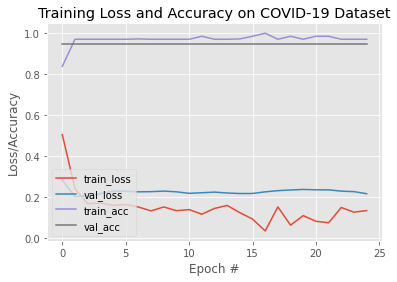

In [ ]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig(args["plot"])

In [ ]:
predIdx_s

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

WITHOUT PRETRAINED MODEL

In [ ]:
model = Sequential()
model.add(Conv2D(80, (3, 3),activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(32, (3, 3),activation='relu'))


model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2,activation='softmax'))

In [25]:
model_chkpt = ModelCheckpoint('best_mod.h5', save_best_only=True, monitor='accuracy')
early_stopping = EarlyStopping(monitor='loss', restore_best_weights=False, patience=10)

In [ ]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-3
EPOCHS = 25
BS = 8
# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])
# train the head of the network
print("[INFO] training head...")
H = model.fit_generator(
	trAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS,callbacks=[early_stopping,model_chkpt])

[INFO] compiling model...
[INFO] training head...


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/25


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


9/9 [==============================] - 12s 1s/step - loss: 1.3110 - accuracy: 0.9265 - val_loss: 0.3116 - val_accuracy: 0.9474
Epoch 2/25
9/9 [==============================] - 11s 1s/step - loss: 0.1705 - accuracy: 0.9706 - val_loss: 0.6196 - val_accuracy: 0.9474
Epoch 3/25
9/9 [==============================] - 11s 1s/step - loss: 0.1985 - accuracy: 0.9706 - val_loss: 0.3000 - val_accuracy: 0.9474
Epoch 4/25
9/9 [==============================] - 11s 1s/step - loss: 0.1336 - accuracy: 0.9722 - val_loss: 0.4585 - val_accuracy: 0.9474
Epoch 5/25
9/9 [==============================] - 11s 1s/step - loss: 0.1421 - accuracy: 0.9706 - val_loss: 0.4446 - val_accuracy: 0.9474
Epoch 6/25
9/9 [==============================] - 11s 1s/step - loss: 0.0937 - accuracy: 0.9853 - val_loss: 0.2492 - val_accuracy: 0.9474
Epoch 7/25
9/9 [==============================] - 11s 1s/step - loss: 0.0419 - accuracy: 0.9853 - val_loss: 0.2798 - val_accuracy: 0.9474
Epoch 8/25
9/9 [=============================

In [ ]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

    infected       0.95      1.00      0.97        18
      normal       0.00      0.00      0.00         1

    accuracy                           0.95        19
   macro avg       0.47      0.50      0.49        19
weighted avg       0.90      0.95      0.92        19



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[18  0]
 [ 1  0]]
acc: 0.9474
sensitivity: 1.0000
specificity: 0.0000


In [ ]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig(args["plot"])

RESNET50

In [16]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

In [17]:
res = ResNet50(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
outputs = res.output
outputs = Flatten(name="flatten")(outputs)
outputs = Dropout(0.5)(outputs)
outputs = Dense(2, activation="softmax")(outputs)
model = Model(inputs=res.input, outputs=outputs)
for layer in res.layers:
  layer.trainable = False

94781440/94765736 [==============================] - 0s 0us/step


In [26]:
model_chkpt = ModelCheckpoint('best_mod.h5', save_best_only=True, monitor='accuracy')
early_stopping = EarlyStopping(monitor='loss', restore_best_weights=False, patience=10)

In [27]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-3
EPOCHS = 25
BS = 8
# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])
# train the head of the network
print("[INFO] training head...")
H = model.fit_generator(
	trAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS,callbacks=[early_stopping,model_chkpt])

[INFO] compiling model...
[INFO] training head...


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/25
9/9 [==============================] - 16s 562ms/step - loss: 0.5906 - accuracy: 0.7500 - val_loss: 0.3514 - val_accuracy: 0.9474
Epoch 2/25
9/9 [==============================] - 1s 127ms/step - loss: 0.3005 - accuracy: 0.9706 - val_loss: 0.2384 - val_accuracy: 0.9474
Epoch 3/25
9/9 [==============================] - 1s 113ms/step - loss: 0.2165 - accuracy: 0.9706 - val_loss: 0.2051 - val_accuracy: 0.9474
Epoch 4/25
9/9 [==============================] - 1s 130ms/step - loss: 0.1334 - accuracy: 0.9853 - val_loss: 0.2009 - val_accuracy: 0.9474
Epoch 5/25
9/9 [==============================] - 1s 118ms/step - loss: 0.1510 - accuracy: 0.9706 - val_loss: 0.2061 - val_accuracy: 0.9474
Epoch 6/25
9/9 [==============================] - 1s 108ms/step - loss: 0.1893 - accuracy: 0.9706 - val_loss: 0.2083 - val_accuracy: 0.9474
Epoch 7/25
9/9 [==============================] - 1s 112ms/step - loss: 0.1932 - accuracy: 0.9722 - val_loss: 0.2125 - val_accuracy: 0.9474
Epoch 8/25
9/9 [===

In [28]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

    infected       0.95      1.00      0.97        18
      normal       0.00      0.00      0.00         1

    accuracy                           0.95        19
   macro avg       0.47      0.50      0.49        19
weighted avg       0.90      0.95      0.92        19



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[18  0]
 [ 1  0]]
acc: 0.9474
sensitivity: 1.0000
specificity: 0.0000


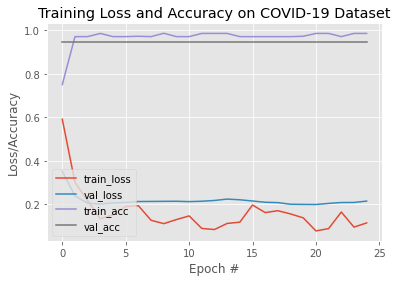

In [30]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, EPOCHS), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, EPOCHS), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, EPOCHS), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, EPOCHS), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig(args["plot"])

MOBILENET BY GOOGLE

In [31]:
import tensorflow as tf

In [32]:
IMG_SHAPE = (224,224,3)

# Create the base model from the pre-trained model MobileNet V2
baseModel = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)


model= Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
    layer.trainable = False

9420800/9406464 [==============================] - 0s 0us/step


In [33]:
model_chkpt = ModelCheckpoint('best_mod.h5', save_best_only=True, monitor='accuracy')
early_stopping = EarlyStopping(monitor='loss', restore_best_weights=False, patience=10)

In [35]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-3
EPOCHS = 25
BS = 8
# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])
# train the head of the network
print("[INFO] training head...")
H = model.fit_generator(
	trAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS,callbacks=[early_stopping,model_chkpt])

[INFO] compiling model...
[INFO] training head...
Epoch 1/25


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


9/9 [==============================] - 5s 290ms/step - loss: 0.4954 - accuracy: 0.9118 - val_loss: 0.2932 - val_accuracy: 0.9474
Epoch 2/25
9/9 [==============================] - 2s 186ms/step - loss: 0.2763 - accuracy: 0.9722 - val_loss: 0.3261 - val_accuracy: 0.9474
Epoch 3/25
9/9 [==============================] - 1s 163ms/step - loss: 0.2442 - accuracy: 0.9706 - val_loss: 0.3139 - val_accuracy: 0.9474
Epoch 4/25
9/9 [==============================] - 1s 153ms/step - loss: 0.0812 - accuracy: 0.9853 - val_loss: 0.2986 - val_accuracy: 0.9474
Epoch 5/25
9/9 [==============================] - 1s 91ms/step - loss: 0.2445 - accuracy: 0.9853 - val_loss: 0.2655 - val_accuracy: 0.9474
Epoch 6/25
9/9 [==============================] - 1s 92ms/step - loss: 0.2064 - accuracy: 0.9706 - val_loss: 0.2319 - val_accuracy: 0.9474
Epoch 7/25
9/9 [==============================] - 1s 90ms/step - loss: 0.1102 - accuracy: 0.9706 - val_loss: 0.2138 - val_accuracy: 0.9474
Epoch 8/25
9/9 [==================

In [36]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

    infected       0.95      1.00      0.97        18
      normal       0.00      0.00      0.00         1

    accuracy                           0.95        19
   macro avg       0.47      0.50      0.49        19
weighted avg       0.90      0.95      0.92        19



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[18  0]
 [ 1  0]]
acc: 0.9474
sensitivity: 1.0000
specificity: 0.0000


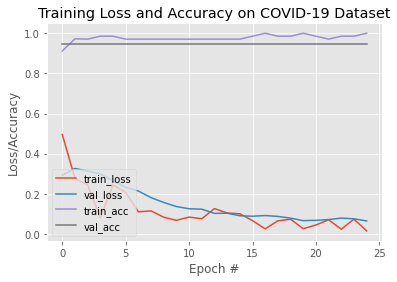

In [38]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, EPOCHS), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, EPOCHS), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, EPOCHS), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, EPOCHS), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig(args["plot"])

INCEPTION RESNETV2

In [39]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input

In [40]:
IMG_SHAPE = (224,224,3)

# Create the base model from the pre-trained model Xception
baseModel = InceptionResNetV2(include_top=False,weights='imagenet',input_tensor=Input(shape=(224, 224, 3)))
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)


InceptionResNetV2_model= Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
    layer.trainable = False

219070464/219055592 [==============================] - 1s 0us/step


In [42]:
model_chkpt = ModelCheckpoint('best_mod.h5', save_best_only=True, monitor='accuracy')
early_stopping = EarlyStopping(monitor='loss', restore_best_weights=False, patience=10)

# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-3
EPOCHS = 25
BS = 8
# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
InceptionResNetV2_model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])
# train the head of the network
print("[INFO] training head...")
H = InceptionResNetV2_model.fit_generator(
	trAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS,callbacks=[early_stopping,model_chkpt])

[INFO] compiling model...
[INFO] training head...


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/25
9/9 [==============================] - 20s 1s/step - loss: 0.7611 - accuracy: 0.8382 - val_loss: 0.6218 - val_accuracy: 0.9474
Epoch 2/25
9/9 [==============================] - 3s 326ms/step - loss: 0.5171 - accuracy: 0.9706 - val_loss: 0.6473 - val_accuracy: 0.9474
Epoch 3/25
9/9 [==============================] - 1s 133ms/step - loss: 0.3094 - accuracy: 0.9706 - val_loss: 0.4838 - val_accuracy: 0.9474
Epoch 4/25
9/9 [==============================] - 3s 308ms/step - loss: 0.2190 - accuracy: 0.9722 - val_loss: 0.3340 - val_accuracy: 0.9474
Epoch 5/25
9/9 [==============================] - 1s 125ms/step - loss: 0.1988 - accuracy: 0.9706 - val_loss: 0.2580 - val_accuracy: 0.9474
Epoch 6/25
9/9 [==============================] - 1s 145ms/step - loss: 0.1347 - accuracy: 0.9706 - val_loss: 0.1811 - val_accuracy: 0.9474
Epoch 7/25
9/9 [==============================] - 1s 125ms/step - loss: 0.1191 - accuracy: 0.9706 - val_loss: 0.2035 - val_accuracy: 0.9474
Epoch 8/25
9/9 [======

[INFO] evaluating network...
              precision    recall  f1-score   support

    infected       0.95      1.00      0.97        18
      normal       0.00      0.00      0.00         1

    accuracy                           0.95        19
   macro avg       0.47      0.50      0.49        19
weighted avg       0.90      0.95      0.92        19

[[18  0]
 [ 1  0]]
acc: 0.9474
sensitivity: 1.0000
specificity: 0.0000


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


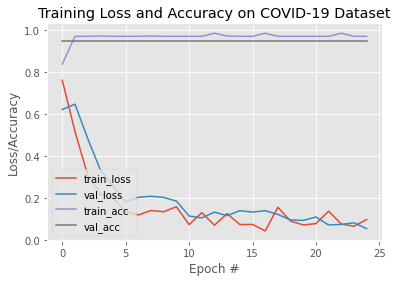

In [43]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = InceptionResNetV2_model.predict(testX, batch_size=BS)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))



  # compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))


# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, EPOCHS), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, EPOCHS), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, EPOCHS), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, EPOCHS), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig(args["plot"])